# Personality Segmentation for Market Analysis



*Are you looking for a way to better understand your target market? Do you want to know what drives customer spending behavior and how to tailor your marketing strategy to increase sales? Look no further than this exciting new project on personality segmentation using clustering methods.*

In this project, we explore the spending habits of customers using cluster analysis to group individuals with similar personality traits. Through extensive exploratory data analysis, we identify key variables that drive customer spending behavior and analyze their relationship to the total amount spent.

By understanding the unique personalities and spending patterns of different customer segments, businesses can create targeted marketing campaigns and tailored product offerings that resonate with their target audience. This can lead to increased customer loyalty, higher sales, and a better understanding of the factors that drive consumer behavior.

Join us on this journey as we explore the fascinating world of personality segmentation and uncover insights that can help businesses thrive in an increasingly competitive marketplace.

# Importing Libraries

In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.metrics import silhouette_samples,silhouette_score
import warnings
warnings.simplefilter('ignore')

In [173]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing DataSet

In [174]:
df= pd.read_csv('/content/drive/My Drive/DataSet/marketing_campaign.csv', sep='\t')

# Descriptive Analysis

| Variable              | Description                                                                                                                                                                                                                                                             |
|-----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ID                    | A unique identifier for each customer.                                                                                                                                                                   |
| Year_Birth            | The year of birth of the customer.                                                                                                                                                                        |
| Education             | The highest level of education achieved by the customer. Possible values include: "Basic", "Graduation", "Master", "PhD", "2n Cycle".                                                                    |
| Marital_Status        | The marital status of the customer. Possible values include: "Single", "Married", "Divorced", "Together", "Widow", "YOLO".                                                                              |
| Income                | The annual income of the customer.                                                                                                                                                                        |
| Kidhome               | The number of children in the household aged between 0 and 12 years old.                                                                                                                                   |
| Teenhome              | The number of children in the household aged between 12 and 19 years old.                                                                                                                                  |
| Dt_Customer           | The date of customer's enrollment with the company.                                                                                                                                                        |
| Recency               | The number of days since the customer's last purchase.                                                                                                                                                     |
| MntWines              | The amount spent by the customer on wine products.                                                                                                                                                         |
| MntFruits             | The amount spent by the customer on fruit products.                                                                                                                                                        |
| MntMeatProducts       | The amount spent by the customer on meat products.                                                                                                                                                         |
| MntFishProducts       | The amount spent by the customer on fish products.                                                                                                                                                         |
| MntSweetProducts      | The amount spent by the customer on sweet products.                                                                                                                                                        |
| MntGoldProds          | The amount spent by the customer on gold products.                                                                                                                                                          |
| NumDealsPurchases     | The number of purchases made by the customer with a discount coupon.                                                                                                                                        |
| NumWebPurchases       | The number of purchases made by the customer through the company's website.                                                                                                                                 |
| NumCatalogPurchases   | The number of purchases made by the customer through a catalog.                                                                                                                                             |
| NumStorePurchases     | The number of purchases made by the customer directly at the store.                                                                                                                                         |
| NumWebVisitsMonth     | The number of visits made by the customer to the company's website in the last month.                                                                                                                       |
| AcceptedCmp3          | Whether or not the customer accepted the third campaign.                                                                                                                                                   |
| AcceptedCmp4          | Whether or not the customer accepted the fourth campaign.                                                                                                                                                  |
| AcceptedCmp5          | Whether or not the customer accepted the fifth campaign.                                                                                                                                                   |
| AcceptedCmp1          | Whether or not the customer accepted the first campaign.                                                                                                                                                   |
| AcceptedCmp2          | Whether or not the customer accepted the second campaign.                                                                                                                                                  |
| Complain              | Whether or not the customer complained.                                                                                                                                                                    |
| Z_CostContact         | The cost of making contact with the customer.                                                                                                                                                              |
| Z_Revenue             | The revenue from the campaign.                                                                                                                                                                             |
| Response              | Whether or not the customer accepted the offer.                                                                                                                                                            |



In [175]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [176]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

# Data Cleaning

In this data cleaning process, we will be taking a thorough look at the dataset to identify and remove duplicate records, as well as handling any missing or null values. We will also evaluate the relevance of each column and exclude any that do not add value to the analysis. In addition to that, we will extract relevant features that could potentially improve the predictive power of the dataset. By doing so, we aim to ensure that the dataset is clean and optimized for further analysis, modeling and interpretation.





In [177]:
df[df.duplicated(keep= False)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [178]:
index = df[df.isnull().any(axis=1)].index

df.drop(index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [179]:
df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'])


In [180]:
Time_Since_Enrollment = []
date_max = max(df['Dt_Customer'])
for date in df['Dt_Customer']:
    delta = date_max - date
    Time_Since_Enrollment.append(delta)

df['Time_Since_Enrollment'] = Time_Since_Enrollment
df['Time_Since_Enrollment']= df['Time_Since_Enrollment'].dt.days


In [181]:
Cmp= ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'Response']

for i in Cmp:
  df[i]= df[i].astype(np.object)

df.dtypes

ID                                int64
Year_Birth                        int64
Education                        object
Marital_Status                   object
Income                          float64
Kidhome                           int64
Teenhome                          int64
Dt_Customer              datetime64[ns]
Recency                           int64
MntWines                          int64
MntFruits                         int64
MntMeatProducts                   int64
MntFishProducts                   int64
MntSweetProducts                  int64
MntGoldProds                      int64
NumDealsPurchases                 int64
NumWebPurchases                   int64
NumCatalogPurchases               int64
NumStorePurchases                 int64
NumWebVisitsMonth                 int64
AcceptedCmp3                     object
AcceptedCmp4                     object
AcceptedCmp5                     object
AcceptedCmp1                     object
AcceptedCmp2                     object


In [182]:
TotalAcceptedCmp= np.zeros(df.shape[0])

for i in range(len(TotalAcceptedCmp)):
  if df['AcceptedCmp1'][i]==1:
    TotalAcceptedCmp[i] += 1
  if df['AcceptedCmp2'][i]==1:
    TotalAcceptedCmp[i] += 1
  if df['AcceptedCmp3'][i]==1:
    TotalAcceptedCmp[i] += 1
  if df['AcceptedCmp4'][i]==1:
    TotalAcceptedCmp[i] += 1
  if df['AcceptedCmp5'][i]==1:
    TotalAcceptedCmp[i] += 1       

In [183]:
df['TotalAcceptedCmp']= TotalAcceptedCmp.astype(np.int)

In [184]:
df.shape[0]

2216

In [185]:
df['TotalPurchases']= df['NumWebPurchases']+ df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [186]:
df['TotalSpend']= df['MntWines']+df['MntFruits']+df['MntFishProducts']+df['MntGoldProds']+df['MntMeatProducts']+df['MntSweetProducts']

In [187]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Time_Since_Enrollment,TotalAcceptedCmp,TotalPurchases,TotalSpend
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,3,11,1,971,0,25,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,3,11,0,125,0,6,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,472,0,21,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,3,11,0,65,0,8,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,321,0,19,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,3,11,0,541,0,18,1341
2212,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,1,0,0,3,11,0,61,1,22,444
2213,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,3,11,0,315,1,19,1241
2214,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,3,11,0,316,0,23,843


In [188]:
df['Education']= df['Education'].replace({'Basic': 'UnderGraduate', '2n Cycle': 'UnderGraduate', 'Graduation': 'Graduate', 'Master': 'PosGraduate', 'PhD': 'PosGraduate'})

In [189]:
df['Living_With'] = df['Marital_Status'].replace({'Married': 'Together', 'Together': 'Together', 'Single': 'Alone', 'Divorced': 'Alone', 'Widow': 'Alone', 'Alone': 'Alone',
                                                     'Absurd': 'Alone', 'YOLO': 'Alone'})

In [190]:
df['Children']= df['Kidhome']+df['Teenhome']
df['FamilySize']= df['Living_With'].replace({'Alone': 1, 'Together': 2})+df['Children']
df['Is_Parent']= (np.where(df['Children']>0, 1,0)).astype(np.object)

df['Age']= 2023-df['Year_Birth']

In [191]:
df.drop(columns=['Z_CostContact', 'Z_Revenue', 'ID', 'Year_Birth', 'Marital_Status', 'AcceptedCmp1',
                 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Dt_Customer','Kidhome','Teenhome'], axis=1, inplace=True)


# Setting up background

In [193]:
sns.set()
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

custom_style = {
    "axes.facecolor": "#F5F5DC", 
    "axes.edgecolor": "#FFFFFF", 
    "axes.grid": True, 
    "grid.color": "#FFFFFF",
    "grid.linestyle": "-", 
    "xtick.major.size": 0, 
    "ytick.major.size": 0, 
    "text.color": "#000000", 
}

sns.set_style("dark", custom_style)


# Outliers... Where Do They Come From and Where Are They Hiding?

Detecting and handling outliers is a crucial step in the data cleaning process. Outliers are extreme values that can significantly affect the results of data analysis and machine learning models. In this code snippet, we use the Interquartile Range (IQR) method to identify and remove outliers. By doing so, we aim to improve the quality of the dataset, making it more suitable for further analysis and modeling.

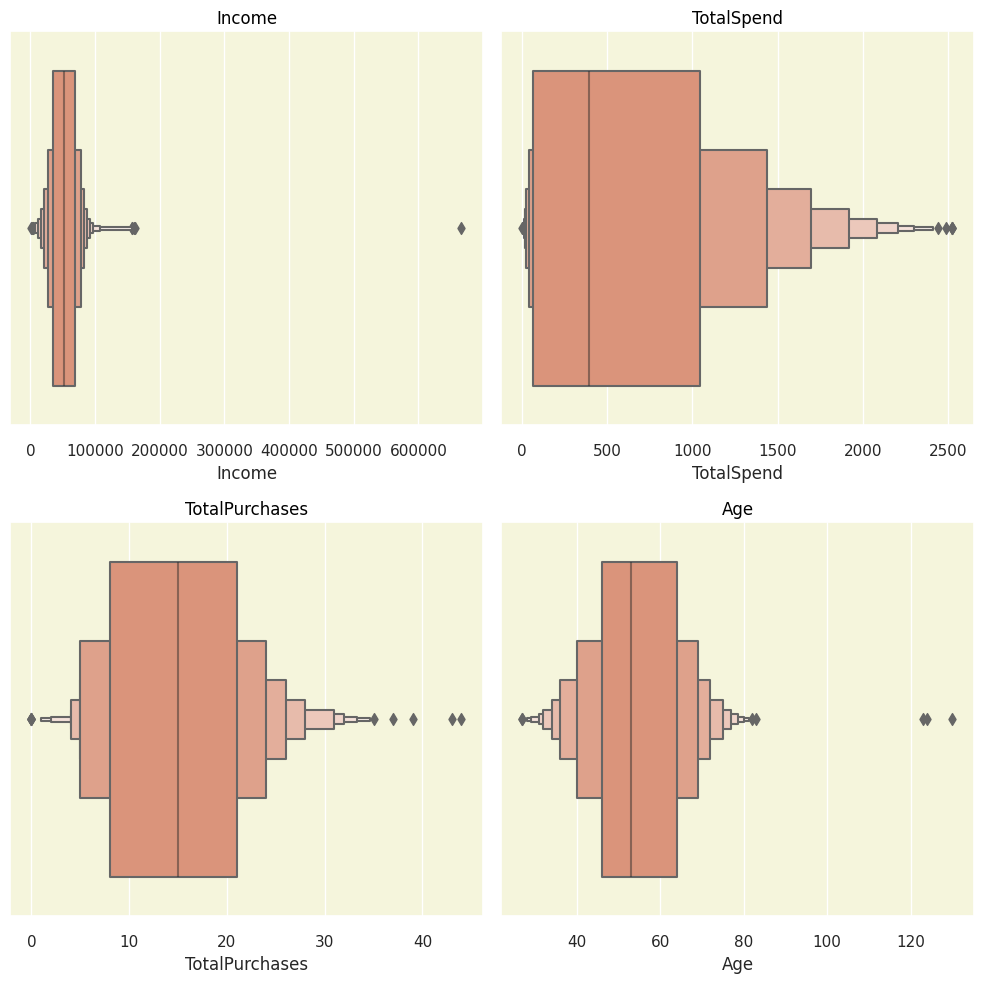

In [194]:
sns.set_palette('flare')
subset = ['Income', 'TotalSpend', 'TotalPurchases', 'Age']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

for col, ax in zip(subset, axs.flatten()):
    sns.boxenplot(x=df[col], ax=ax)
    ax.set_title(col)
    
plt.tight_layout()
plt.show()


In [195]:
outlier= ['Income', 'Age']

for i in outlier:
  q3, q1 = np.nanpercentile(df[i], [75, 25])
  iqr = q3 - q1
  upper_bound = q3 + 1.5 * iqr
  df= df[(df[i] < upper_bound)]

In [196]:
df.shape

(2205, 25)

<Axes: >

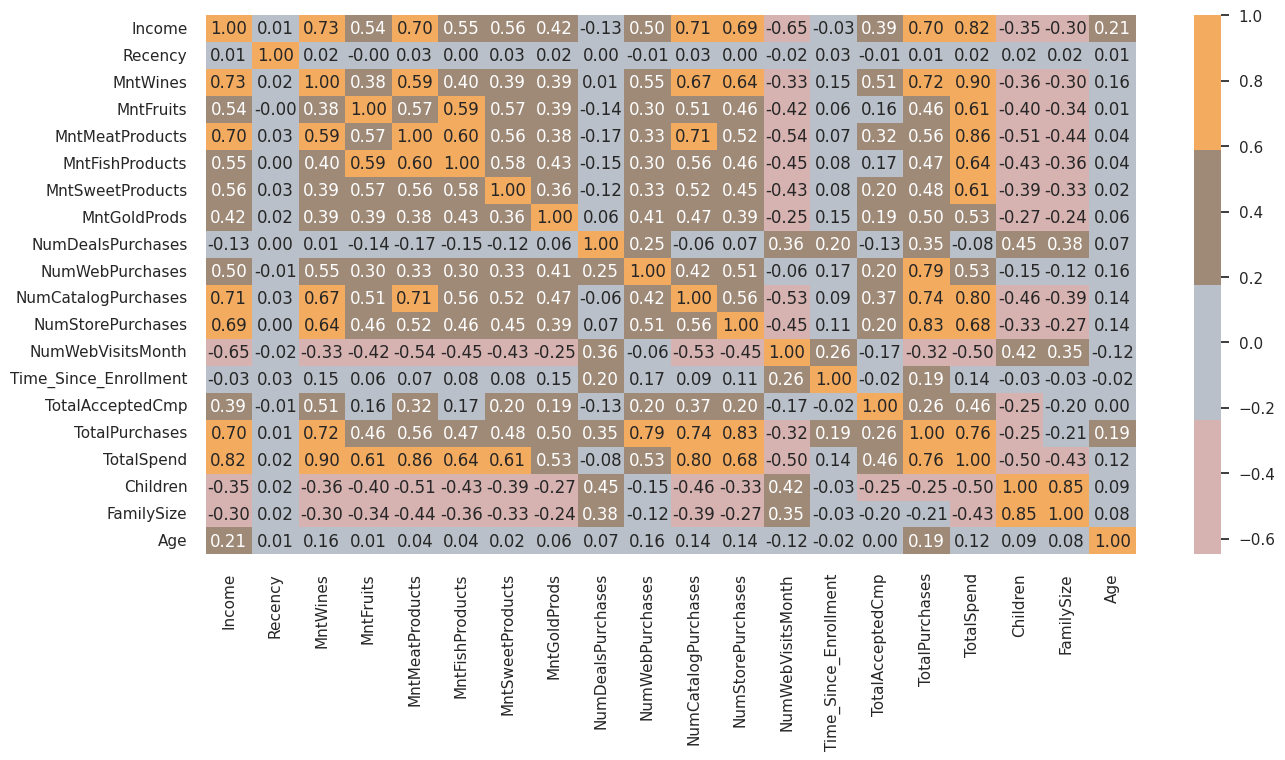

In [205]:
plt.figure(figsize=(15,7))
corr=df.corr() 
sns.heatmap(corr, annot=True, fmt='.2f', cmap=cmap)

# Data Preparation

In [134]:
df_copy= df.copy()
df.dtypes

Education                 object
Income                   float64
Recency                    int64
MntWines                   int64
MntFruits                  int64
MntMeatProducts            int64
MntFishProducts            int64
MntSweetProducts           int64
MntGoldProds               int64
NumDealsPurchases          int64
NumWebPurchases            int64
NumCatalogPurchases        int64
NumStorePurchases          int64
NumWebVisitsMonth          int64
Complain                  object
Response                  object
Time_Since_Enrollment      int64
TotalAcceptedCmp           int64
TotalPurchases             int64
TotalSpend                 int64
Living_With               object
Children                   int64
FamilySize                 int64
Is_Parent                 object
Age                        int64
dtype: object

In [135]:
object_cols= ['Education', 'Complain', 'Response', 'Living_With', 'Is_Parent']
labelencoder= LabelEncoder()

for col in object_cols:
  df[col]= labelencoder.fit_transform(df[col])

In [136]:
scaler= StandardScaler()

df= pd.DataFrame(scaler.fit_transform(df), columns= df.columns)


In [137]:
df.columns

Index(['Education', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'Time_Since_Enrollment', 'TotalAcceptedCmp',
       'TotalPurchases', 'TotalSpend', 'Living_With', 'Children', 'FamilySize',
       'Is_Parent', 'Age'],
      dtype='object')

# Reducing the dimensionality

Dimensionality reduction is very importante in clustering as it allows for the reduction of the number of features without significant loss of information. This reduction leads to more efficient and accurate clustering results, as it eliminates the noise and redundant information present in the dataset.

One of the most commonly used methods for dimensionality reduction is Principal Component Analysis (PCA), which transforms the original features into a new set of orthogonal variables called principal components. These principal components are ranked by the amount of variance they explain in the data and can be used to represent the original features with fewer dimensions.

By applying PCA before clustering, we can identify the most important dimensions that contribute to the clustering structure and discard the ones that are irrelevant. This not only reduces the computational cost but also improves the interpretability and visualizability of the clustering results. Overall, dimensionality reduction plays a crucial role in the success of clustering algorithms and should be carefully considered in any clustering project.

In [138]:
pca= PCA(n_components=3, random_state=0)

df_pca= pd.DataFrame(pca.fit_transform(df), columns=(['col1', 'col2', 'col3']))
df_pca.describe()

,col1,col2,col3
count,2.205000e+03,2.205000e+03,2.205000e+03
mean,-2.577933e-17,3.222416e-17,-4.189141e-17
std,2.949801e+00,1.646685e+00,1.280181e+00
min,-5.474464e+00,-4.100547e+00,-3.181264e+00
25%,-2.677745e+00,-1.169762e+00,-9.577206e-01
50%,-7.959214e-01,-2.079107e-01,-1.575526e-01
75%,2.467779e+00,1.118319e+00,7.715484e-01
max,8.376718e+00,6.689465e+00,4.912385e+00


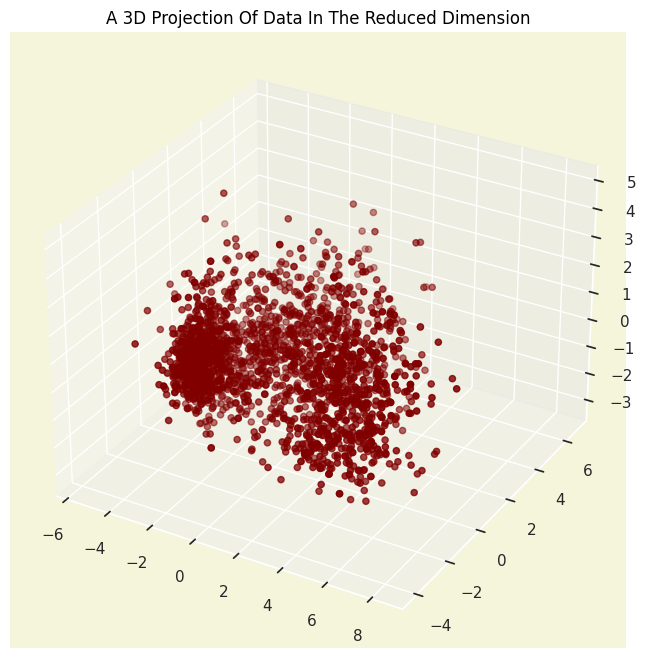

In [139]:
x= df_pca['col1']
y= df_pca['col2']
z= df_pca['col3']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Clustering

Cluster analysis is a powerful technique for finding patterns and groups within data. In this project, we used two popular clustering methods, Agglomerative Clustering and K-Means, to cluster our data into distinct groups. To determine the optimal number of clusters, we used elbow method and silhouette score. Ultimately, we decided on using Agglomerative Clustering with K=3. This method proved to be the most effective in grouping our data into meaningful clusters, allowing for deeper insights and analysis.

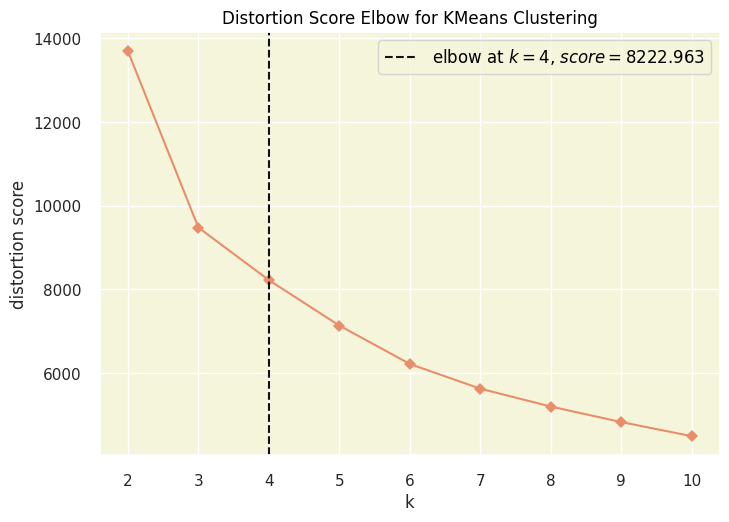

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [140]:
# Define the number of clusters to test up to
kmax = 10

# Create the elbow visualizer object
elbow = KElbowVisualizer(KMeans(), k=kmax, timings=False)
    
# Fit the visualizer to the data
elbow.fit(df_pca)
    
# Plot the elbow plot
elbow.show(title=f"Elbow plot for Kmeans")




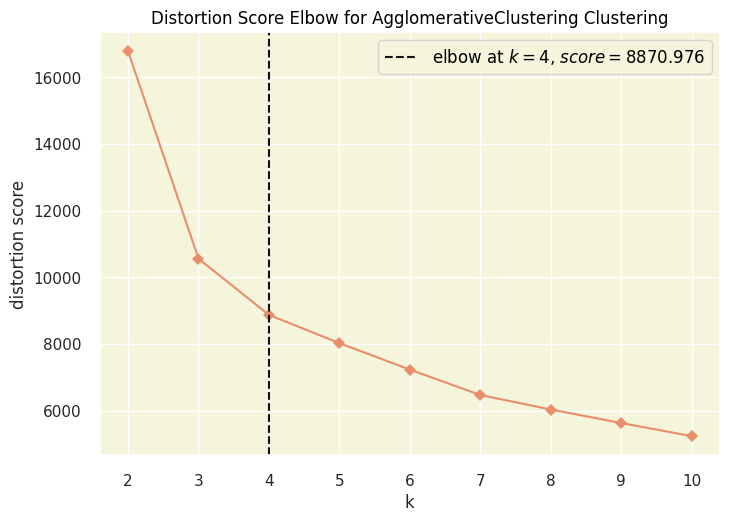

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [141]:
# Create the elbow visualizer object
elbow = KElbowVisualizer(AgglomerativeClustering(), k=kmax, timings=False)
    
# Fit the visualizer to the data
elbow.fit(df_pca)
    
# Plot the elbow plot
elbow.show(title=f"Elbow plot for AgglomerativeClustering")



Method: KMeans
Best k value: 2 Best silhouette score: 0.4640603009259782


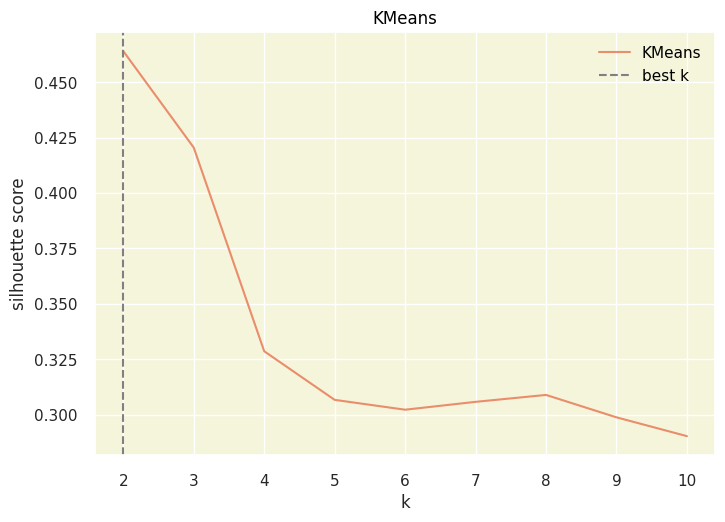

Method: Agglomerative
Best k value: 2 Best silhouette score: 0.42464669179014164


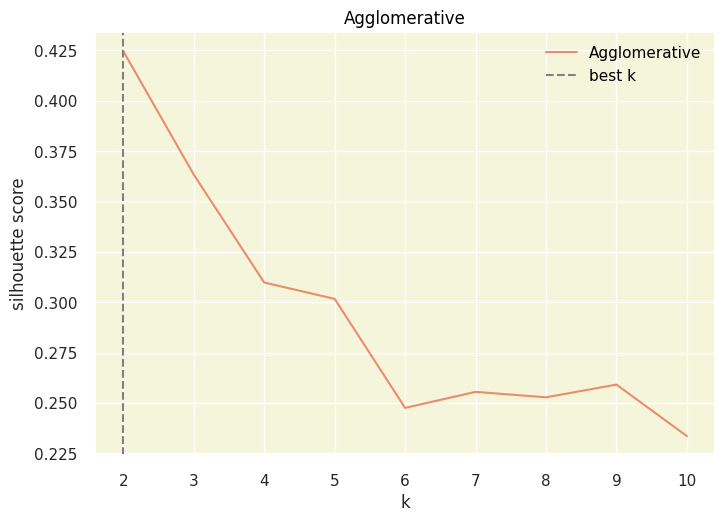

In [142]:
# Define the k values to test
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Define the clustering methods to test
methods = ["KMeans", "Agglomerative"]

# Execute the clustering for each method and each k value
for method in methods:
    print("Method:", method)
    best_score = -1
    best_k = -1
    scores = []
    for k in k_values:
        if method == "KMeans":
            model = KMeans(n_clusters=k)
        elif method == "Agglomerative":
            model = AgglomerativeClustering(n_clusters=k)
        else:
            raise ValueError("Invalid clustering method!")
        labels = model.fit_predict(df_pca)
        score = silhouette_score(df_pca, labels)
        scores.append(score)
        if score > best_score:
            best_score = score
            best_k = k
    print("Best k value:", best_k, "Best silhouette score:", best_score)
    plt.plot(k_values, scores, label=method)
    plt.axvline(x=best_k, linestyle='--', color='gray', label='best k')
    plt.xlabel('k')
    plt.ylabel('silhouette score')
    plt.title(method)
    plt.legend()
    plt.show()


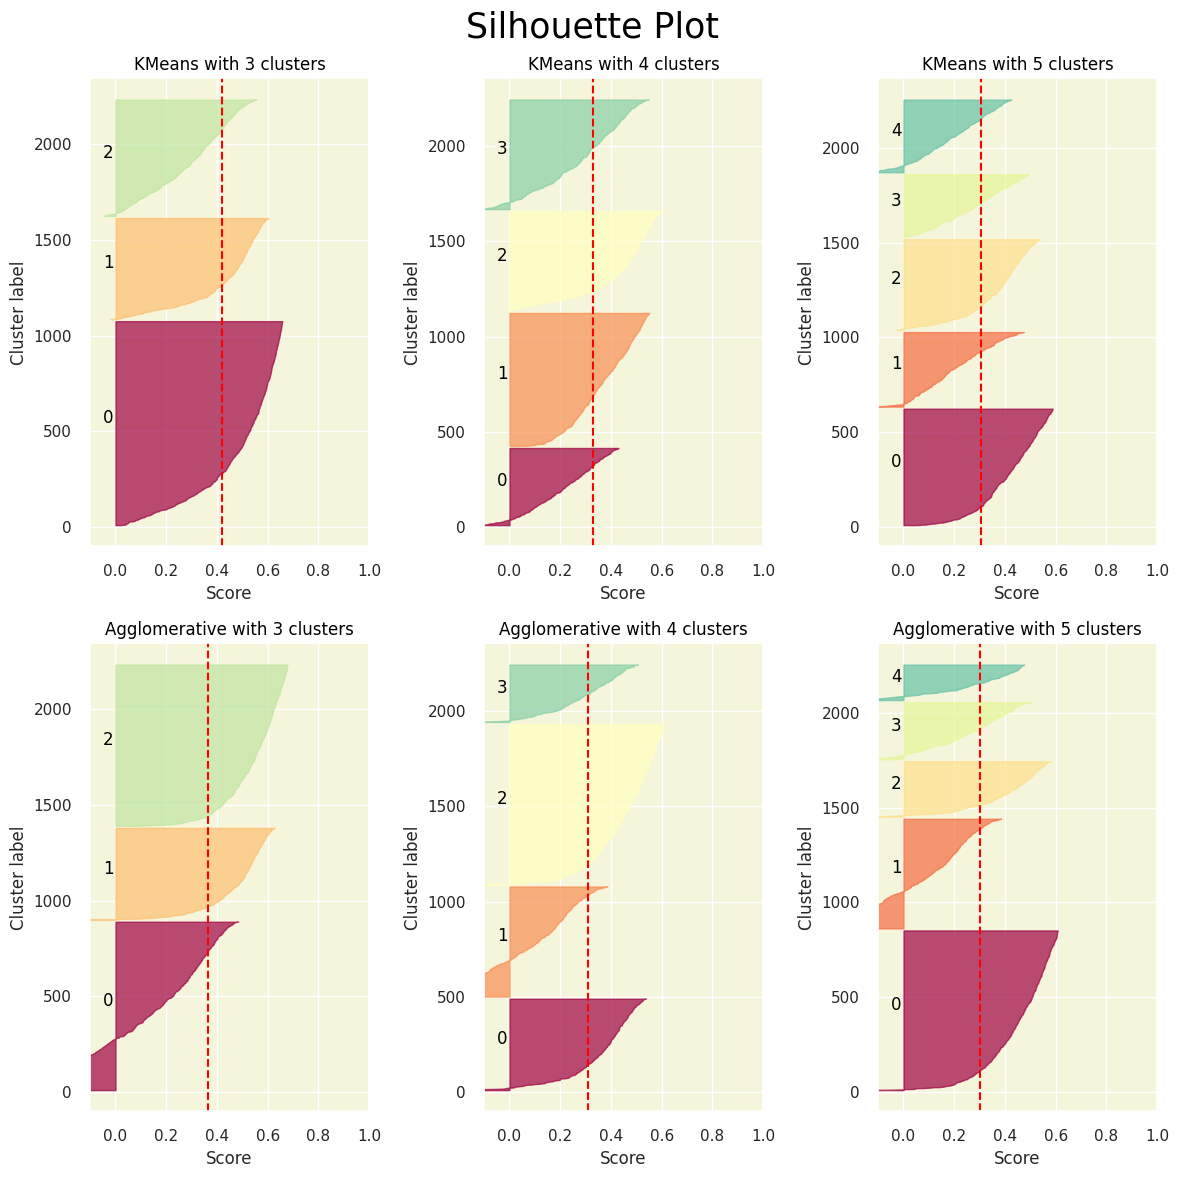

In [143]:
# Define the range of k values
k_values = range(3, 6)

# Define the methods to test
methods = ["KMeans", "Agglomerative"]

# Create a 3x3 subplot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))
axs = axs.flatten()

# Loop over each method and k value
for i, method in enumerate(methods):
    for j, k in enumerate(k_values):
        # Create the model
        if method == "KMeans":
            model = KMeans(n_clusters=k)
        elif method == "Agglomerative":
            model = AgglomerativeClustering(n_clusters=k)
        elif method == "DBSCAN":
            model = DBSCAN(eps=0.5, min_samples=k)
        else:
            raise ValueError("Invalid clustering method")
        
        # Fit the model and predict the clusters
        labels = model.fit_predict(df_pca)
        
        # Calculate the silhouette score
        score = silhouette_score(df_pca, labels)
        
        # Calculate the silhouette score for each sample
        sample_scores = silhouette_samples(df_pca, labels)
        
        # Create a subplot with 1 row and 1 column
        ax = axs[i*3 + j]
        ax.set_xlim([-0.1, 1])
        
        # Plot the silhouette scores for each sample
        y_lower = 10
        for n in range(k):
            # Aggregate the silhouette scores for samples belonging to cluster n
            cluster_samples = sample_scores[labels == n]
            cluster_samples.sort()
            size_cluster_n = cluster_samples.shape[0]
            y_upper = y_lower + size_cluster_n

            # Color the cluster according to its label
            color = plt.cm.Spectral(float(n) / k)

            # Plot the silhouette scores for samples belonging to cluster n
            ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_samples, facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax.text(-0.05, y_lower + 0.5 * size_cluster_n, str(n))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10

        # Label the plot with the overall silhouette score
        ax.axvline(x=score, color="red", linestyle="--")
        ax.set_title(f"{method} with {k} clusters")
        ax.set_xlabel("Score")
        ax.set_ylabel("Cluster label")

fig.suptitle('Silhouette Plot', size=25)
plt.tight_layout()
plt.show()


In [144]:
AC= AgglomerativeClustering(n_clusters=3)

ypred=AC.fit_predict(df_pca)
df_pca['Cluster']= ypred

df_copy['Cluster']= ypred

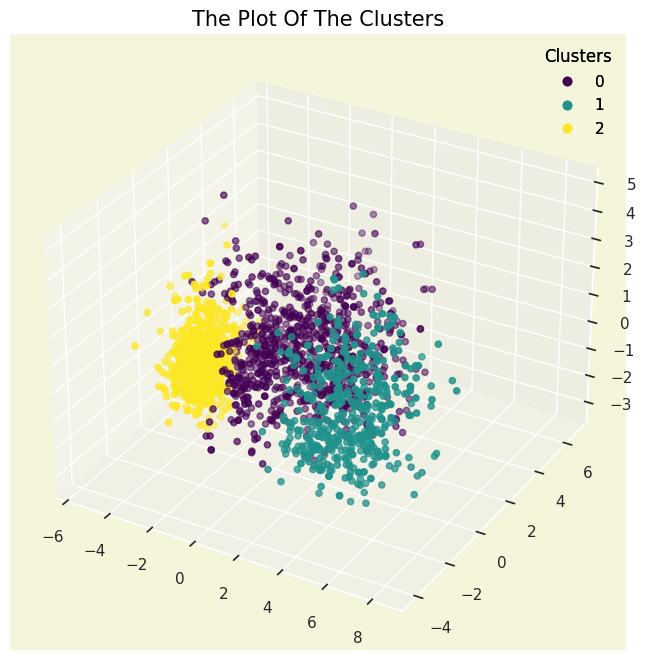

In [161]:
plt.figure(figsize=(13,8))

ax = plt.subplot(111, projection='3d', label='bla')
scatter = ax.scatter(x, y, z, c=df_pca['Cluster'], marker='o', cmap='viridis')
ax.set_title("The Plot Of The Clusters", size=15) 

legend = ax.legend(*scatter.legend_elements(),
                   loc="upper right", title="Clusters")
ax.add_artist(legend)



# Evaluating Clusters and Profiling

Now, it's essential to evaluate the quality of the generated clusters and profile them. The evaluation of clusters aims to assess how well the algorithm has identified meaningful patterns in the data. On the other hand, profiling clusters allows us to identify characteristics that distinguish each group from the others, enabling us to gain insights into the data. This step is crucial for decision-making processes, such as targeted marketing, customer segmentation, and product recommendation. In this phase, we will use various visualization techniques to evaluate and profile the clusters obtained.







Text(0.5, 1.0, 'Clusters Distribution')

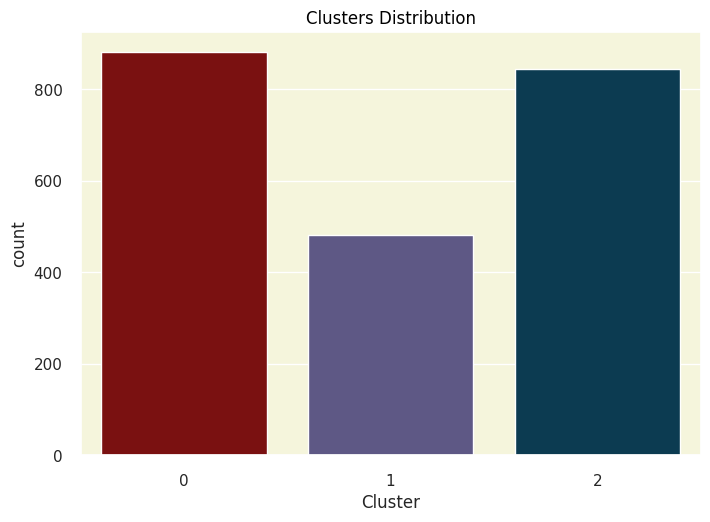

In [146]:
palette = [ '#8b0000', '#58508d', '#003f5c']
sns.set_palette('flare')
sns.countplot(x=df_pca['Cluster'], palette= palette)
plt.title('Clusters Distribution')

Text(0.5, 1.0, ' Clusters profile based on totalspend and income')

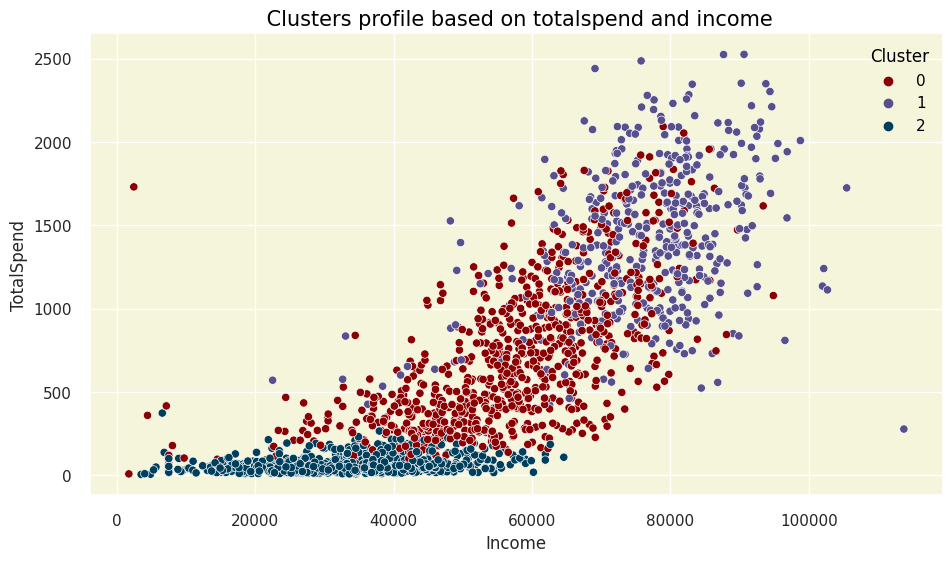

In [147]:

plt.figure(figsize=(11,6))

sns.scatterplot(x='Income', y='TotalSpend', data= df_copy, hue= 'Cluster', palette=palette)
plt.title(' Clusters profile based on totalspend and income', size=15)

- Cluster 0 - Income(38000 to 80000) and TotalSpend(250 to 1750)

- Cluster 1 - Income(200 to 60000) and TotalSpend(0 to 250)

- Cluster 2 - Income(60000 to 90000) and TotalSpend(800 to 2300)





Text(0.5, 1.0, 'Boxenplot of Income for each Cluster')

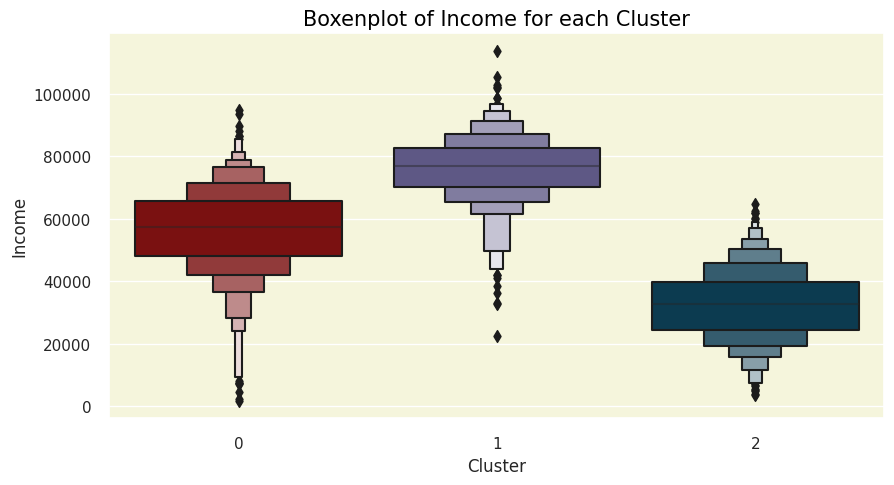

In [148]:
plt.figure(figsize=(10,5))
sns.boxenplot(x= df_copy['Cluster'], y= df_copy['Income'], palette=palette )
plt.title('Boxenplot of Income for each Cluster', size=15)

Text(0.5, 1.0, 'Boxenplot of Total Spend for each Cluster')

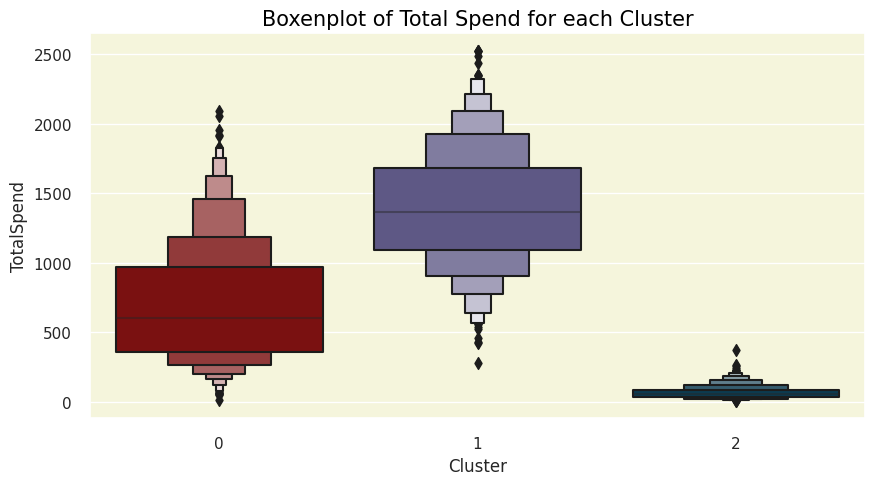

In [149]:
plt.figure(figsize=(10,5))
sns.boxenplot(x= df_copy['Cluster'], y= df_copy['TotalSpend'], palette=palette )
plt.title('Boxenplot of Total Spend for each Cluster', size=15)

Text(0.5, 1.0, 'Boxenplot of Age for each Cluster')

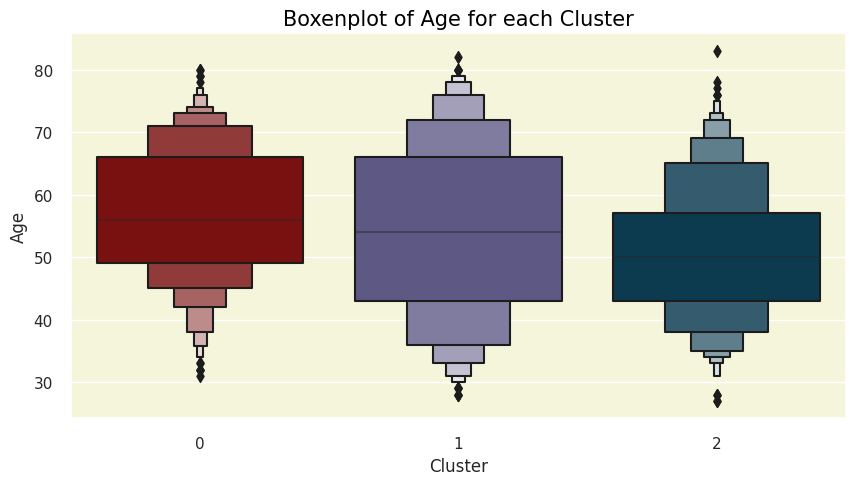

In [150]:
plt.figure(figsize=(10,5))
sns.boxenplot(x= df_copy['Cluster'], y= df_copy['Age'], palette=palette)
plt.title('Boxenplot of Age for each Cluster', size=15)

The 'Age' variable was not found to be important in differentiating the clusters. Perhaps other variables are more relevant for this task and therefore produce more distinct clusters.

Text(0.5, 1.0, 'Boxenplot of Total Purchases for each Cluster')

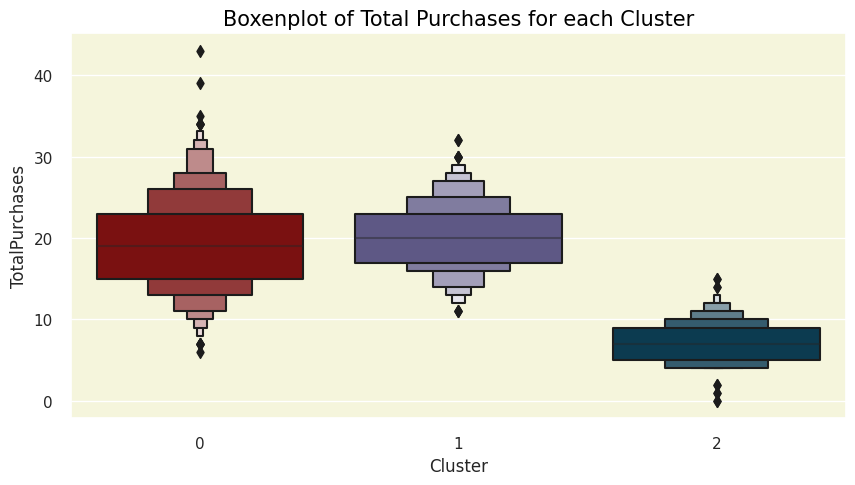

In [151]:
plt.figure(figsize=(10,5))
sns.boxenplot(x= df_copy['Cluster'], y= df_copy['TotalPurchases'], palette=palette)
plt.title('Boxenplot of Total Purchases for each Cluster', size=15)

- Cluster 0 - TotalPurchases(12 to 30)

- Cluster 1 - TotalPurchases(6 to 12)

- Cluster 2 - TotalPurchases(15 to 27)

Text(0.5, 1.0, 'Boxenplot of Total Purchases for each Cluster')

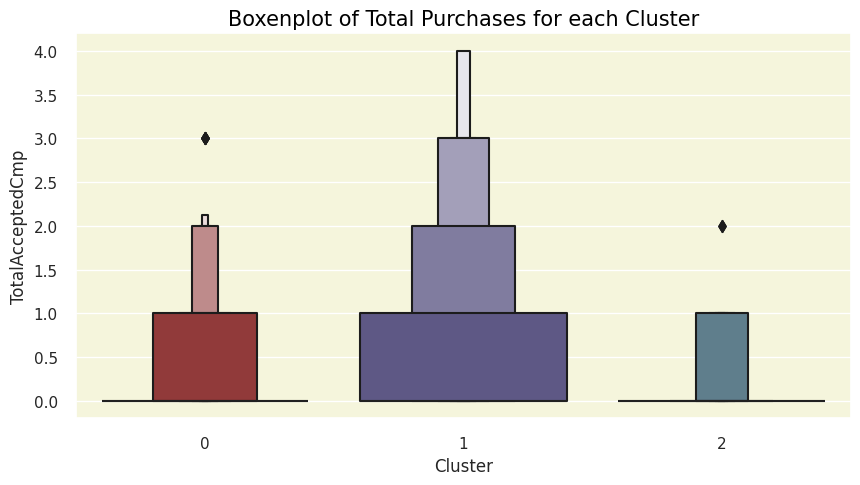

In [152]:
plt.figure(figsize=(10,5))
sns.boxenplot(x= df_copy['Cluster'], y= df_copy['TotalAcceptedCmp'], palette=palette)
plt.title('Boxenplot of Total Purchases for each Cluster', size=15)

<Axes: title={'center': 'Distribution of TotalAccepted campaigns variable'}, xlabel='TotalAcceptedCmp', ylabel='count'>

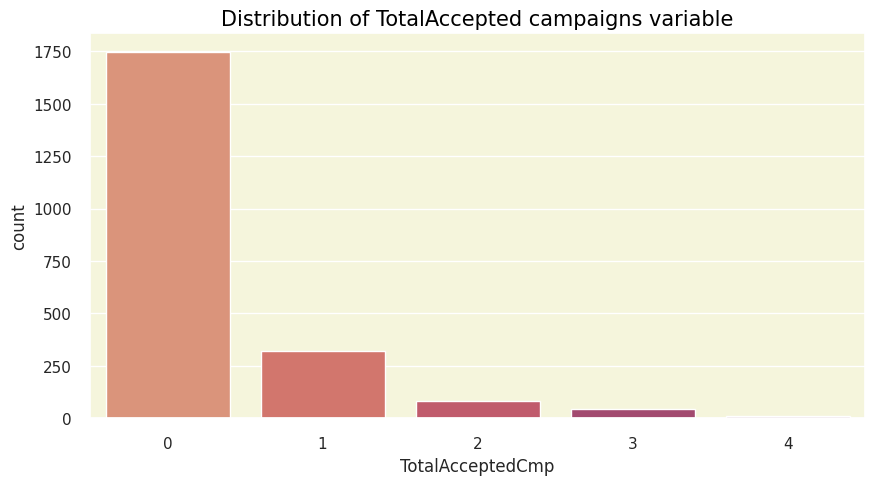

In [153]:
plt.figure(figsize=(10,5))
plt.title('Distribution of TotalAccepted campaigns variable', size=15)
sns.countplot(x=df_copy['TotalAcceptedCmp'])

The graph above clearly shows an issue with the marketing campaigns, indicating that the team needs to work on a more personalized approach to improve the feedback effectiveness.

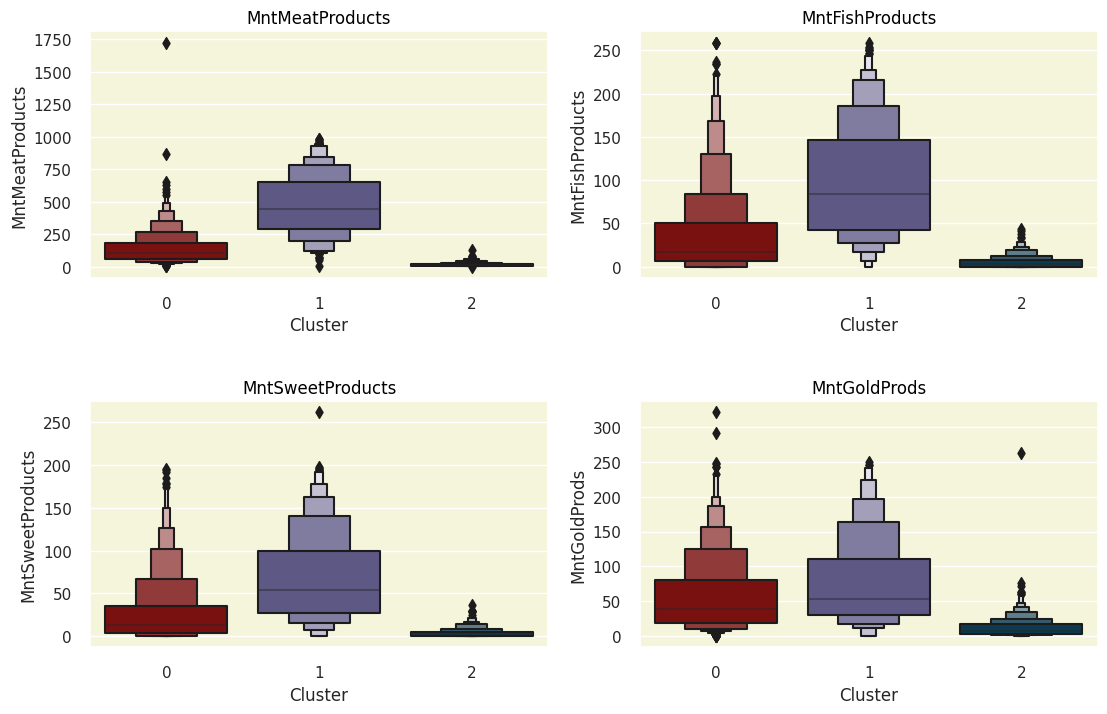

In [154]:
amount_products = ['MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

fig, axs = plt.subplots(2, 2, figsize=(13, 8))
fig.subplots_adjust(hspace=0.5)

for i, product in enumerate(amount_products):
    row = i // 2
    col = i % 2
    sns.boxenplot(x=df_copy['Cluster'], y=df_copy[product], ax=axs[row, col], palette=palette)
    axs[row, col].set_title(product)


Since I have already analyzed the TotalSpend variable, it is not necessary to analyze each spending category separately. However, there seems to be a similar behavior across all spend categories.

The customers segmented in the cluster 0 

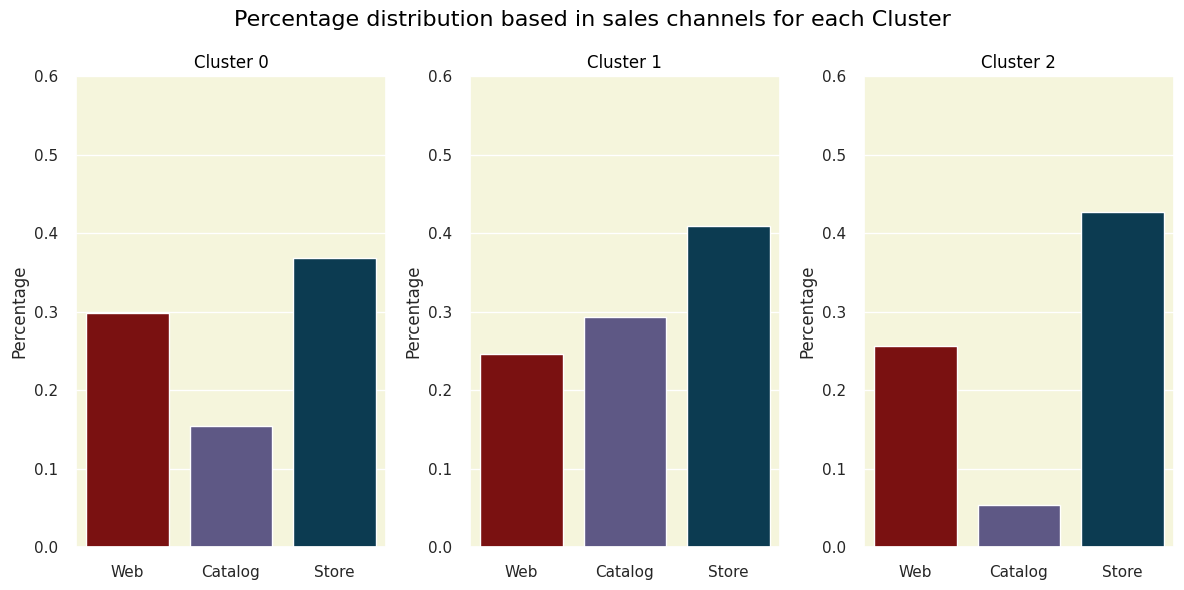

In [155]:
# Defining the purchase variables
purchases = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
purchase_names = ['Web', 'Catalog', 'Store']

# Defining the clusters
clusters = [0, 1, 2]

# Creating the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 6))
fig.suptitle('Percentage distribution based in sales channels for each Cluster', size=16)
# Looping over the clusters
for i, cluster in enumerate(clusters):
    # Selecting the data for the current cluster
    df_cluster = df_copy[df_copy['Cluster'] == cluster]
    
    # Calculating the percentages of each purchase variable in the cluster
    percentages = []
    for purchase in purchases:
        percentage = df_cluster[purchase].sum() / df_cluster['TotalPurchases'].sum()
        percentages.append(percentage)
    
    # Creating the bar chart for the cluster
    sns.barplot(x=purchase_names, y=percentages, ax=axs[i], palette=palette)
    axs[i].set_title(f'Cluster {cluster}')
    axs[i].set_ylim([0, 1])
    axs[i].set_ylabel('Percentage')
    axs[i].set_ylim([0,0.6])

# Adjusting the layout of the subplots
plt.tight_layout()

# Displaying the chart
plt.show()




We can clearly note that most of the purchases are done in the store, physically.

Adicional insight:

Customer of Cluster 1 usually use more catalog than other to do their purchases.


Mean dealspurchases Cluster 0: 18.21%
Mean dealspurchases Cluster 1: 5.27%
Mean dealspurchases Cluster 2: 25.22%


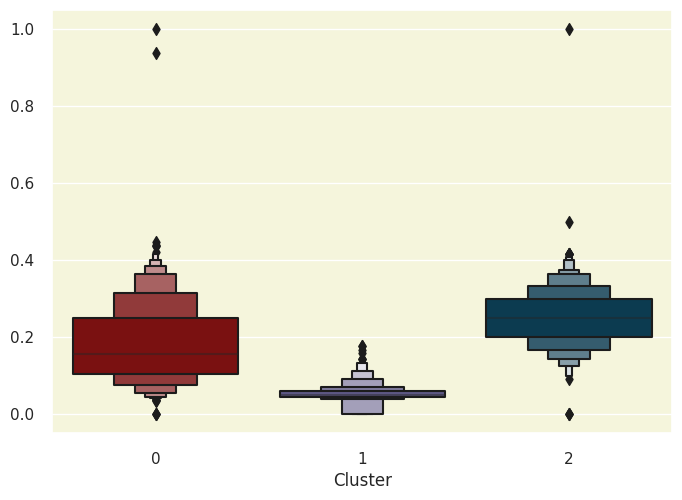

In [156]:
plt.figure()
pl=sns.boxenplot(y=(df_copy["NumDealsPurchases"]/df_copy['TotalPurchases']),x=df_copy["Cluster"], palette= palette)

deals_percentages = df_copy["NumDealsPurchases"]/df_copy['TotalPurchases']

mean_values = deals_percentages.groupby(df_copy['Cluster']).mean()

print('Mean dealspurchases Cluster 0: {:.2%}'.format(mean_values[0]))
print('Mean dealspurchases Cluster 1: {:.2%}'.format(mean_values[1]))
print('Mean dealspurchases Cluster 2: {:.2%}'.format(mean_values[2]))
plt.show()


Cluster 2 shows a good return on promotions, as 25.22% of the total purchases are made under promotional conditions. Following this, cluster 0 shows 18.213% of total purchases. Finally, cluster 1 shows an irrelevant propensity for making dealspurchases.


---



---



---



As the main objective is to increase the **TotalSpending variable**, which will result in greater financial gains for the company, we will now examine the categorical variables in relation to spending in each cluster. 
To do this, we will use *jointplots* to visualize the relationship between some categorical variables and spending in each cluster. This will help us identify any patterns or trends that can be used to optimize spending strategies and increase TotalSpending. By analyzing the *jointplots*, we will be able to see which categories have a higher spending value in each cluster, and use this information to target those categories with more specific marketing strategies.

---



<Figure size 2000x1000 with 0 Axes>

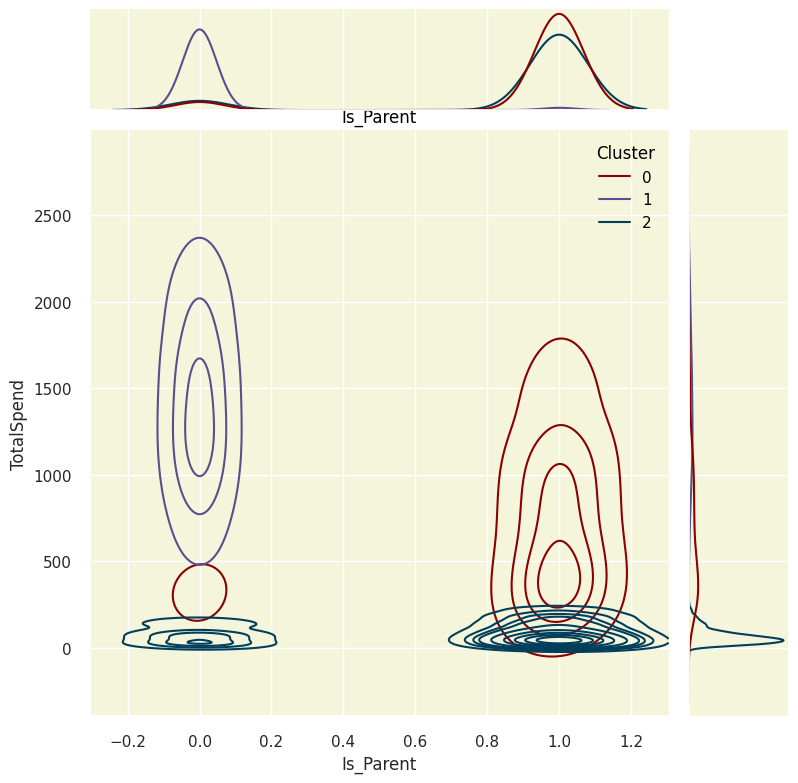

<Figure size 2000x1000 with 0 Axes>

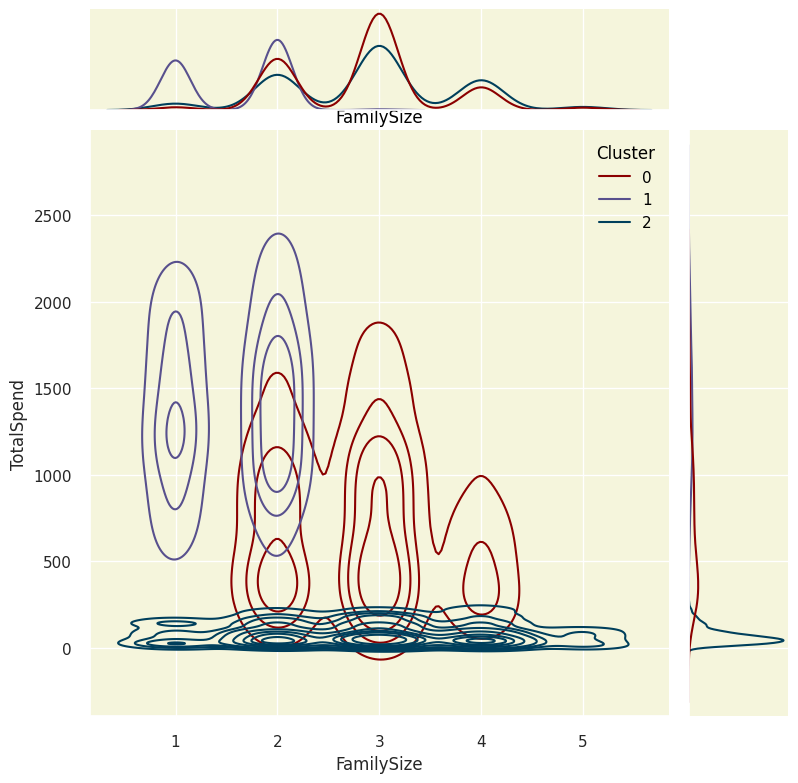

<Figure size 2000x1000 with 0 Axes>

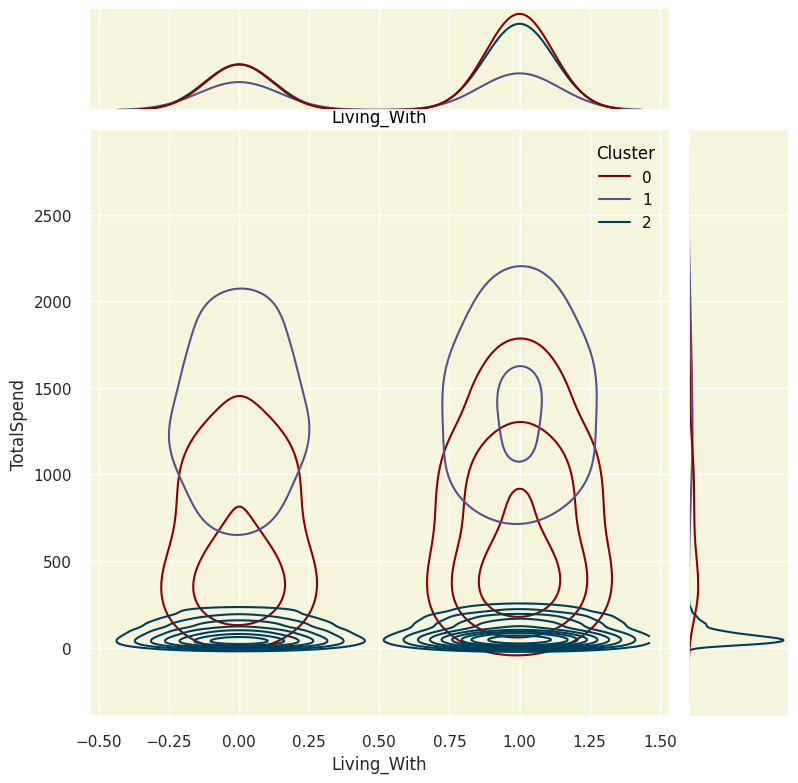

<Figure size 2000x1000 with 0 Axes>

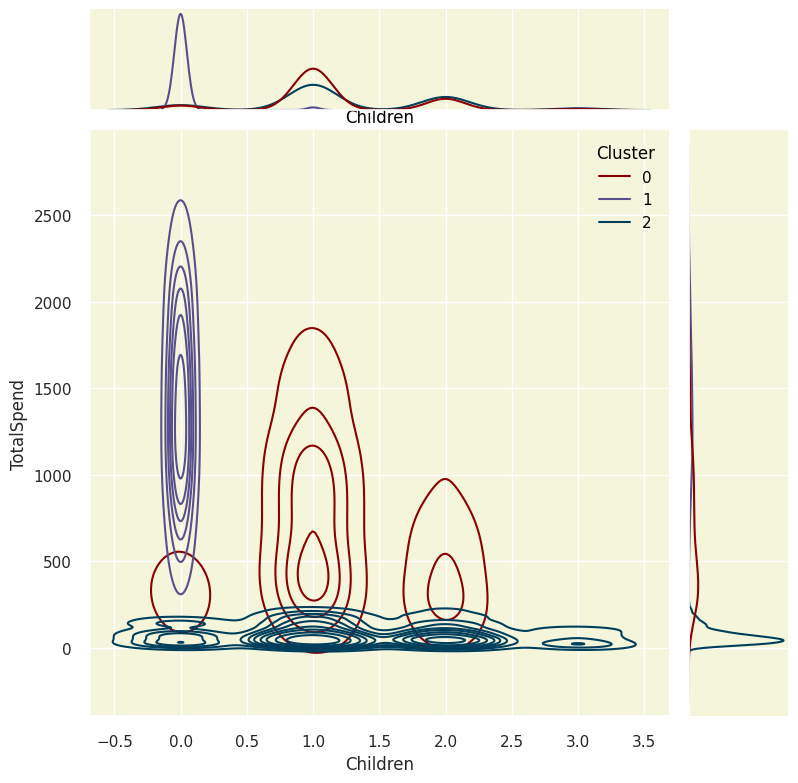

<Figure size 2000x1000 with 0 Axes>

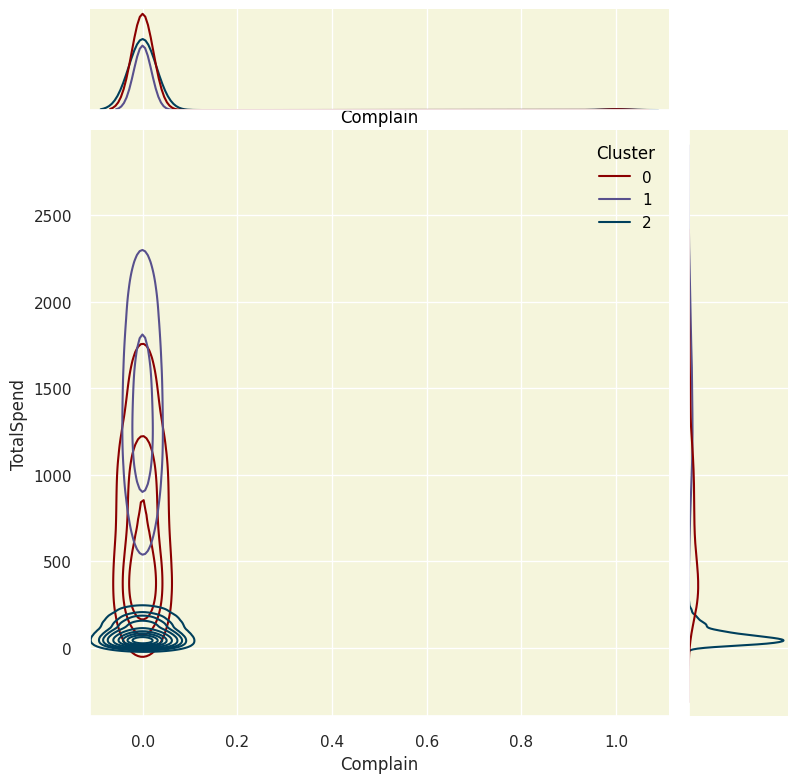

<Figure size 2000x1000 with 0 Axes>

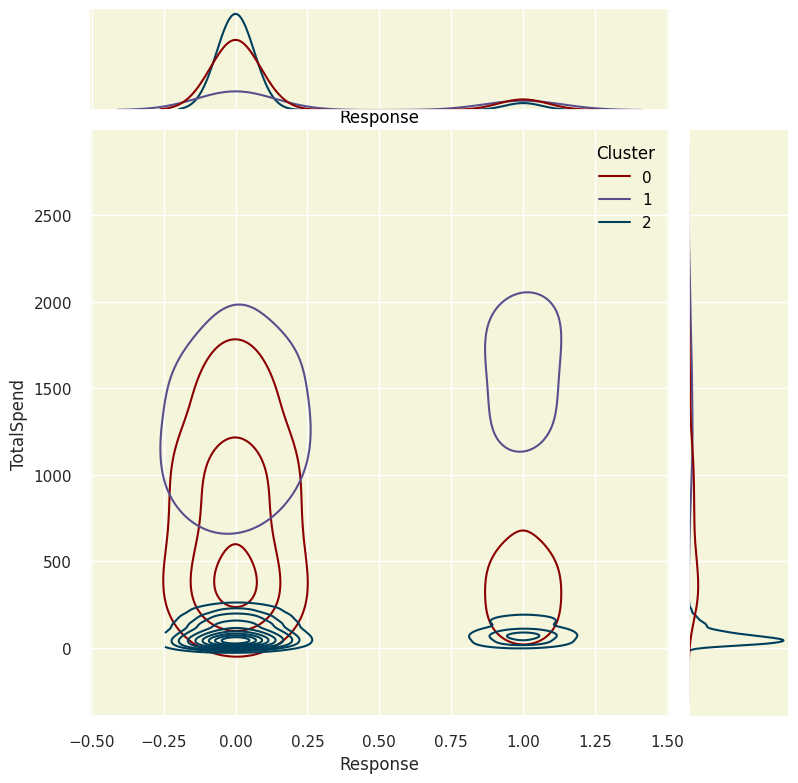

<Figure size 2000x1000 with 0 Axes>

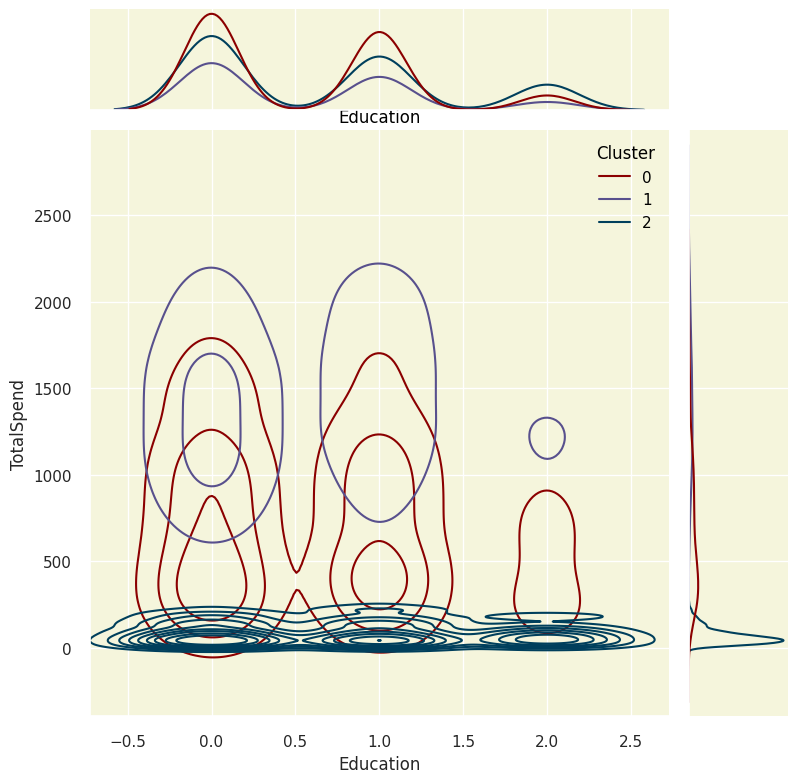

In [159]:
categorical=['Is_Parent', 'FamilySize', 'Living_With', 'Children','Complain','Response', 'Education']
df_copy2= df_copy.copy()
for categorical in categorical:
    plt.figure(figsize=(20,10))
    #correcting some variable type
    if categorical!='FamilySize':
      df_copy2[categorical]= labelencoder.fit_transform(df_copy[categorical])
    plot= sns.jointplot(x=df_copy2[categorical], y=df_copy2['TotalSpend'], hue=df_copy2['Cluster'], kind='kde', palette=palette, height=8, aspect=2)
    
    plt.title(categorical)


# Final Report

The aim of this report is to present recommendations based on the results of a personality segmentation project using cluster analysis.


---



- About the Clusterization:

The distribution of the three clusters is somewhat balanced, although cluster 2 appears to be less prevalent than the other two.


---





# Profile of Cluster 0: Key Characteristics and Insights


- Middle income group(earning between 38000 to 80000);
- Middle spending habits, with most customers spending between 250 and 1750;
- Relatively older;
- Made 18% of the purchases categorized as 'on promotion;
- Are Parents;
- The family size ranges from a minimum of 2 to a maximum of 4;
- Has 1 at most children, and 2 sometimes;
- Rarely has education degree beyond undergraduate degree.







---
## Profile of Cluster 1: Key Characteristics and Insights

- Low income group (earning between 200 to 60000);
- Low spending habits, with most customers spending between 0 and 250;
- Made only 5,27% of the purchases categorized as 'on promotion;
- Historically more receptive to campaigns;
- Aren't parents;
- The family size is limited to one or two members;
- Rarely has education degree beyond graduate degree.

---
## Profile of Cluster 2: Key Characteristics and Insights

- High income group(earning between 60000 to 90000);
- High spending habits, with most customers spending between 800 and 2300;
- Makes fewer purchases than the majority of customers;
- Made only 25,22% of the purchases categorized as 'on promotion;
- The majority are parents;
- Shows a diverse range of family sizes, with some households consisting of as few as 2 members and others as many as 5;
- Up to 3 children;
- Well-distributed in terms of education, with a higher proportion of customers holding postgraduate degrees compared to other clusters.

*Regardless of the category of the product (such as fish, sweets, or meat), the observed pattern in the TotalSpend variable remains valid.*










*When it comes to sales, the store is the most common sales channel across all three clusters. In addition, Catalog sales are most prevalent in cluster 1, representing approximately 30% of the total SalesChannel. Cluster 0 comes in second, accounting for about 15% of Catalog sales, while cluster 2 has the lowest representation with only 5%.*